# Group 11 Machine Learning Project

Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Exploring Dataset

In [3]:
df=pd.read_csv("/Users/shaikreshma/Downloads/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
df.duplicated().sum()

0

we do not have any missing values

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
unwanted_features = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=unwanted_features)

we  have drop RowNumber', 'CustomerId', 'Surname as this are not important to the project

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical columns: ['Geography', 'Gender']


In [11]:
unique_values = df['Geography'].unique()

print("Unique values in the column:", unique_values)

Unique values in the column: ['France' 'Spain' 'Germany']


In [12]:
unique_values = df['Gender'].value_counts()
print("Unique values in the column:")
print(unique_values)

Unique values in the column:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [13]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

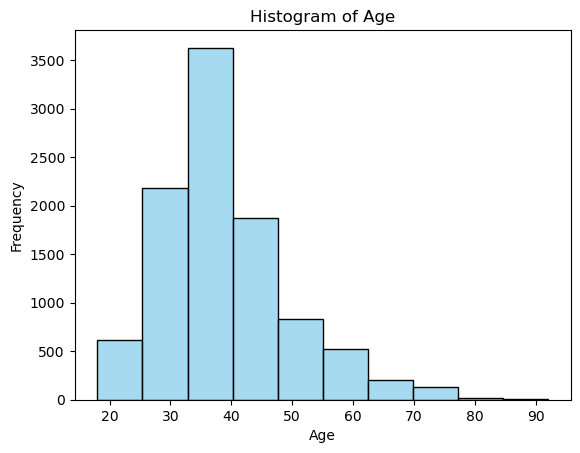

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='Age', bins=10, color='skyblue', edgecolor='black', kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

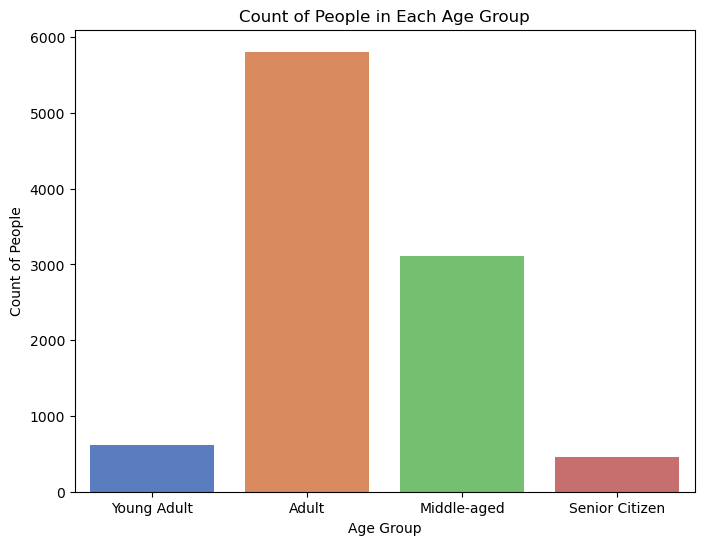

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given a DataFrame df with an 'age' column
# Define age groups
age_groups = pd.cut(
    df['Age'],
    bins=[18, 25, 40, 60, 94],  # Group boundaries
    labels=['Young Adult', 'Adult', 'Middle-aged', 'Senior Citizen'],  # Group names
    include_lowest=True  # Include the lower bound
)

# Assign the age group back to the DataFrame
df['age_group'] = age_groups

# Count the number of people in each age group
group_counts = df['age_group'].value_counts().sort_index()  # Ensures order by defined age groups

# Create a bar plot for the counts of each age group
plt.figure(figsize=(8, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='muted')  # Muted colors for better readability
plt.xlabel('Age Group')
plt.ylabel('Count of People')
plt.title('Count of People in Each Age Group')
plt.show()


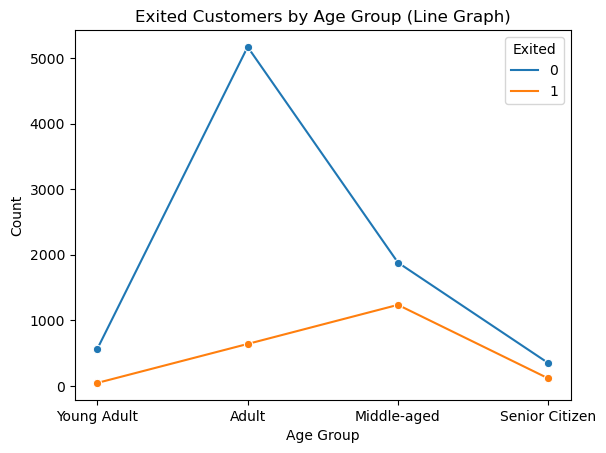

In [16]:
# Calculate the counts of Exited for each age group
age_group_counts = df.groupby(['age_group', 'Exited']).size().reset_index(name='Count')

# Use a line plot to show counts by age group
sns.lineplot(x='age_group', y='Count', hue='Exited', data=age_group_counts, marker='o')

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Exited Customers by Age Group (Line Graph)')
# Show the plot
plt.show()


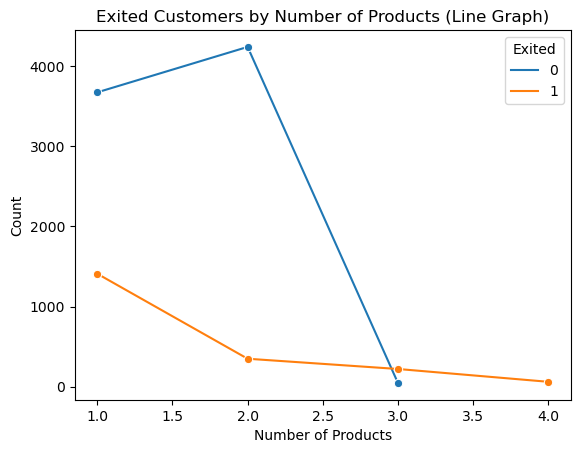

In [17]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by the 'NumOfProducts' and 'Exited' columns, then count the occurrences
product_counts = df.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')

# Create a line plot with 'NumOfProducts' on the x-axis and 'Count' on the y-axis, with 'Exited' as the hue
sns.lineplot(x='NumOfProducts', y='Count', hue='Exited', data=product_counts, marker='o')

# Set plot labels and title
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Exited Customers by Number of Products (Line Graph)')

# Show the plot
plt.show()


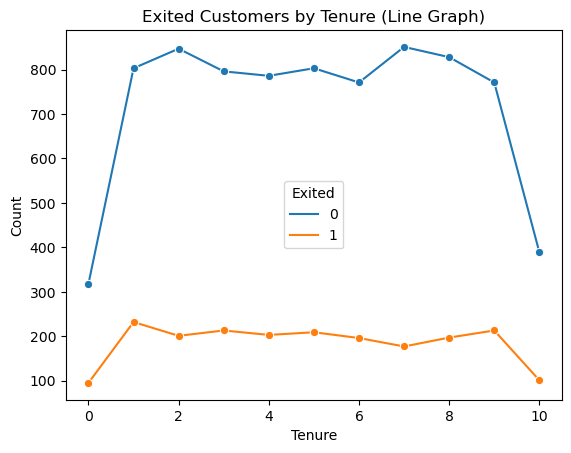

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Tenure' and 'Exited' to count occurrences
tenure_exited_counts = df.groupby(['Tenure', 'Exited']).size().reset_index(name='Count')

# Create a line plot
sns.lineplot(data=tenure_exited_counts, x='Tenure', y='Count', hue='Exited', marker='o')

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Exited Customers by Tenure (Line Graph)')

# Show the plot
plt.show()


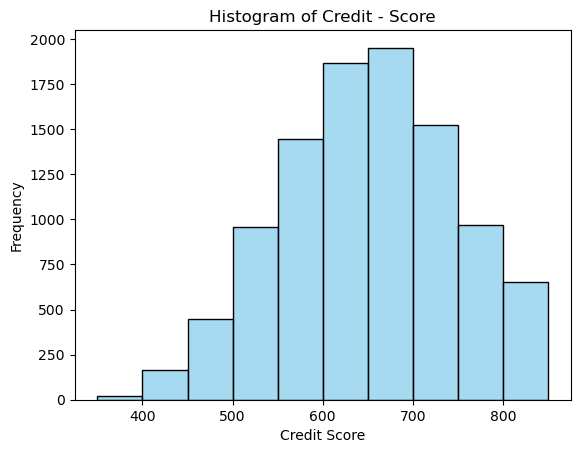

In [19]:
sns.histplot(data=df, x='CreditScore', bins=10, color='skyblue', edgecolor='black', kde=False)
plt.title('Histogram of Credit - Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

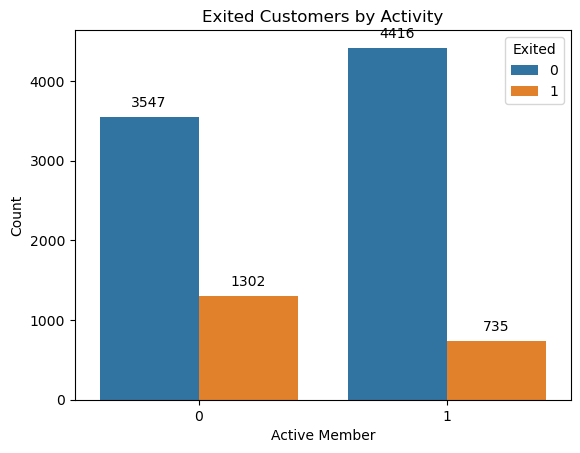

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=df)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # the count value
        (p.get_x() + p.get_width() / 2, p.get_height()),  # position
        ha='center',  # horizontal alignment
        va='center',  # vertical alignment
        fontsize=10,  # font size
        color='black',  # text color
        xytext=(0, 10),  # offset
        textcoords='offset points'  # coordinate system
    )

# Set plot labels and title
ax.set_xlabel('Active Member')
ax.set_ylabel('Count')
ax.set_title('Exited Customers by Activity')

# Show the plot
plt.show()


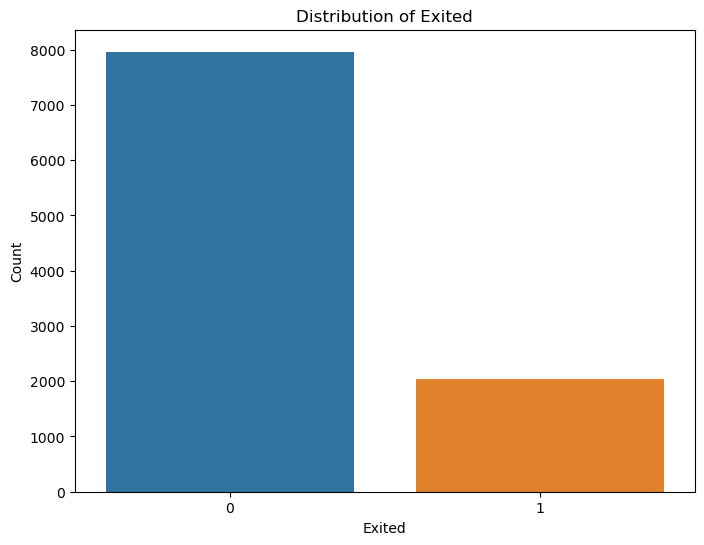

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

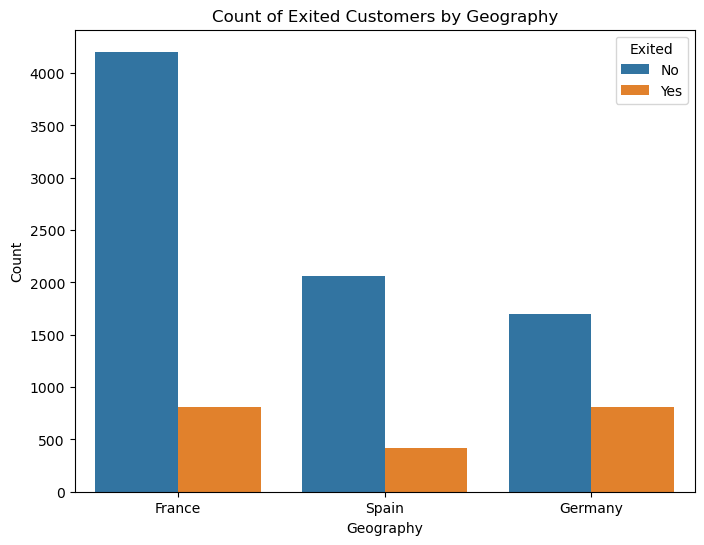

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Count of Exited Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

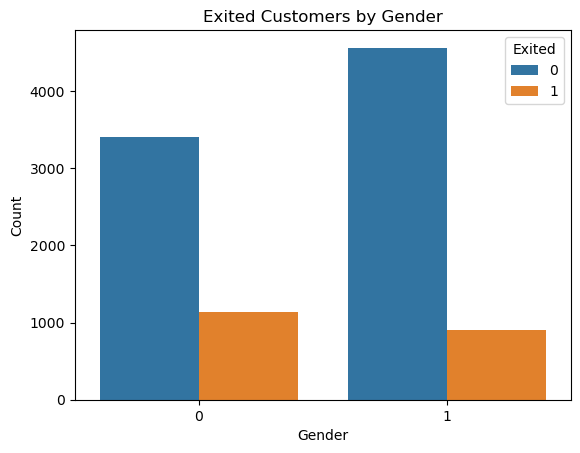

In [23]:
sns.countplot(x='Gender', hue='Exited', data=df)
# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited Customers by Gender')
# Show the plot
plt.show()

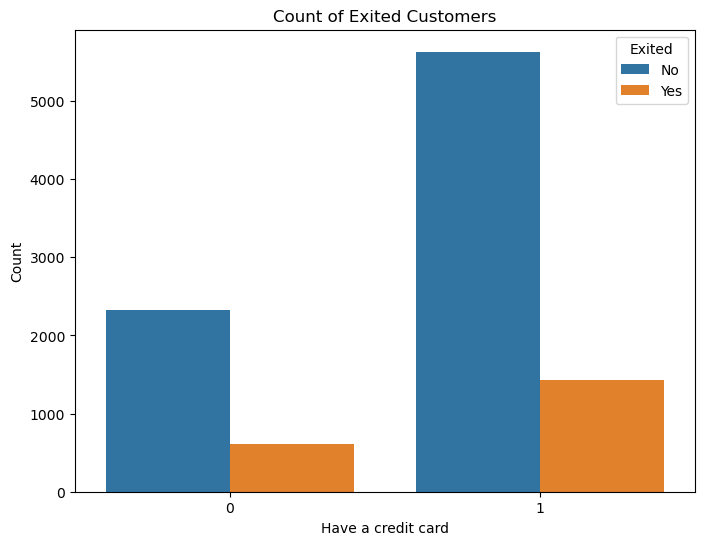

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Count of Exited Customers')
plt.xlabel('Have a credit card')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

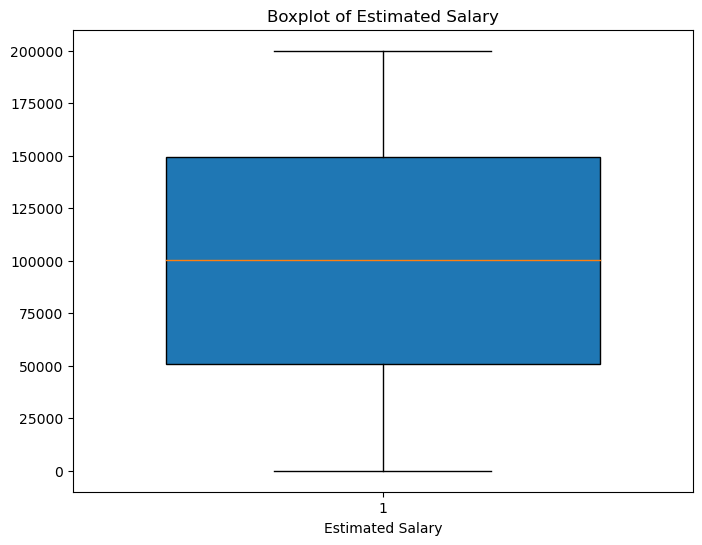

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['EstimatedSalary'], vert=True, widths=0.7, patch_artist=True)
plt.title('Boxplot of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.show()

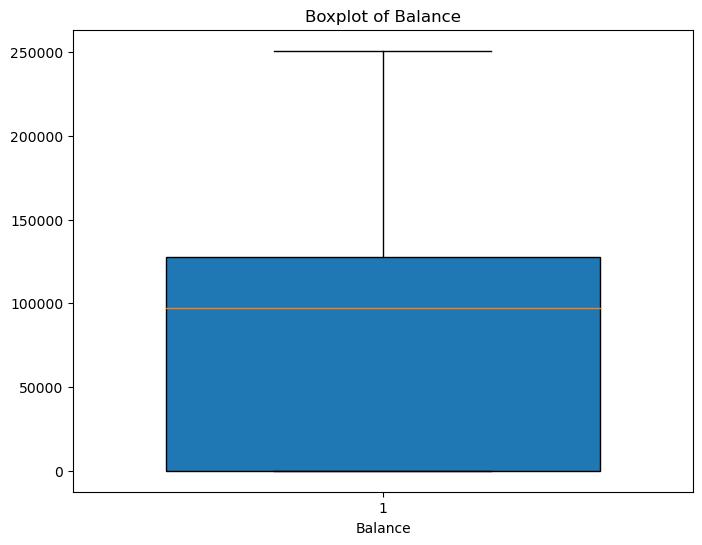

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Balance'], vert=True, widths=0.7, patch_artist=True)
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()

In [27]:

def outlier_Identification():
    Q1 = df['Balance'].quantile(0.25)
    Q3 = df['Balance'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Balance'] < lower_bound) | (df['Balance'] > upper_bound)]['Balance']
    return outliers
outliers = outlier_Identification()
print(outliers)

Series([], Name: Balance, dtype: float64)


As we see that there is no outlier from the boxplot and also using the IOR method, we can confirm that Balance has no Outliers.

In [28]:
#one hot encoding for geography and gender
#encoded_data = pd.get_dummies(df, prefix=['Geography', 'Gender'],dtype=int)
#encoded_data.head()

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
encoded_data = pd.get_dummies(df, columns=categorical_columns, dtype=int)
encoded_data = encoded_data.drop(columns = ['Age'])
encoded_data.head(5)

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,age_group_Young Adult,age_group_Adult,age_group_Middle-aged,age_group_Senior Citizen
0,619,0,2,0.00,1,1,1,101348.88,1,1,0,0,0,0,1,0
1,608,0,1,83807.86,1,0,1,112542.58,0,0,0,1,0,0,1,0
2,502,0,8,159660.80,3,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,1,0.00,2,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,1,0


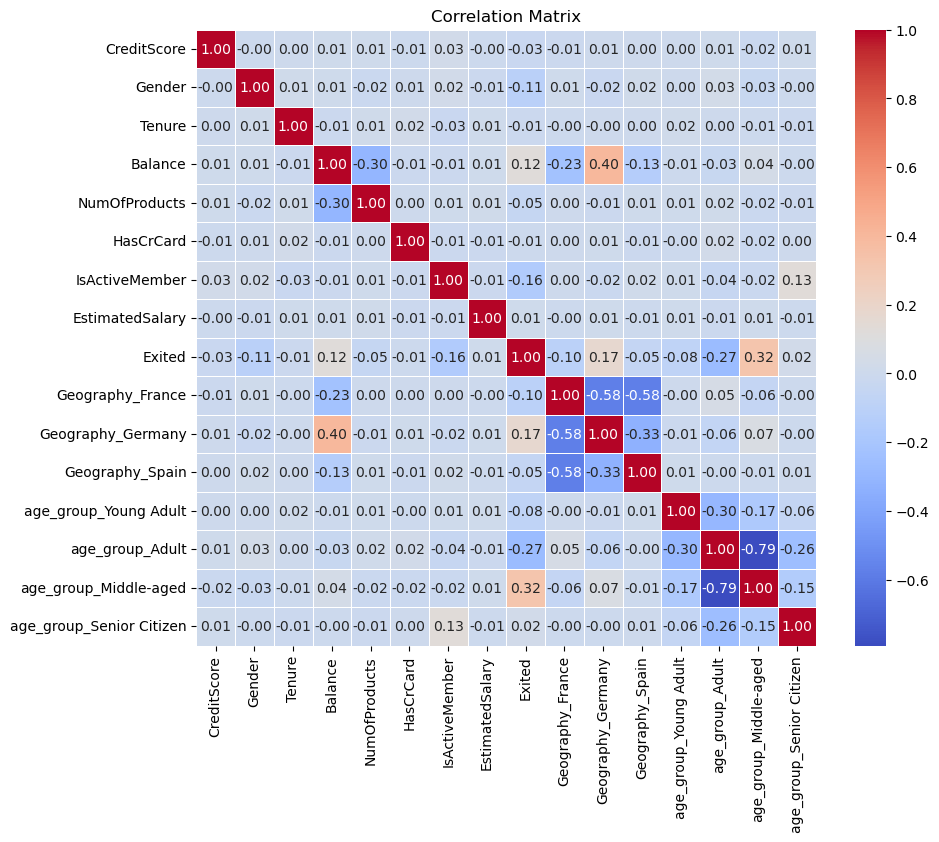

In [29]:
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
y=encoded_data['Exited']
encoded_data = encoded_data.drop(columns = ['Exited'])

In [31]:
encoded_data.head(5)

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,age_group_Young Adult,age_group_Adult,age_group_Middle-aged,age_group_Senior Citizen
0,619,0,2,0.00,1,1,1,101348.88,1,0,0,0,0,1,0
1,608,0,1,83807.86,1,0,1,112542.58,0,0,1,0,0,1,0
2,502,0,8,159660.80,3,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,1,0.00,2,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,2,125510.82,1,1,1,79084.10,0,0,1,0,0,1,0


In [32]:
#correlation_matrix = encoded_data.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Matrix')
#plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for GMM)
scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)

X = encoded_data
# Standardize the features (important for GMM)

X_scaled = scaler.fit_transform(X)

In [34]:
print(y.value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_scaled, y.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(15926, 15)
(15926,)


In [36]:
#pip show imbalanced-learn scikit-learn

#!pip install --upgrade imbalanced-learn scikit-learn
#!pip uninstall imbalanced-learn scikit-learn
#!pip install imbalanced-learn scikit-learn
!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn


Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Successfully uninstalled imbalanced-learn-0.12.2
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)


In [37]:
unique, counts = np.unique(y_resample, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{0: 7963, 1: 7963}


# TRAIN TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state = 50,stratify = y_resample)

In [39]:
print(len(X_train), len(y_train))

12740 12740


In [40]:
#pip install --upgrade scikit-learn joblib


# RANDOM FOREST CLASSIFIER

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [42]:
param_grid = {
    'n_estimators': [100, 300],  
    'max_depth': [None, 20],     
    'min_samples_split': [2, 10],  
    'min_samples_leaf': [1, 4],    
    'max_features': ['sqrt', None]  
}

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=50)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'CV Accuracy Scores: {cv_scores}')
print(f'CV Accuracy Mean: {np.mean(cv_scores):.4f}')

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy of the model: {accuracy:.4f}')

# You can also inspect the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CV Accuracy Scores: [0.87951334 0.88422292 0.87794349 0.89717425 0.89246468]
CV Accuracy Mean: 0.8863
Test Accuracy of the model: 0.8945
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [43]:
# Classification Report (which includes the F1 score)
class_report1 = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report1)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.89      0.91      0.90      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



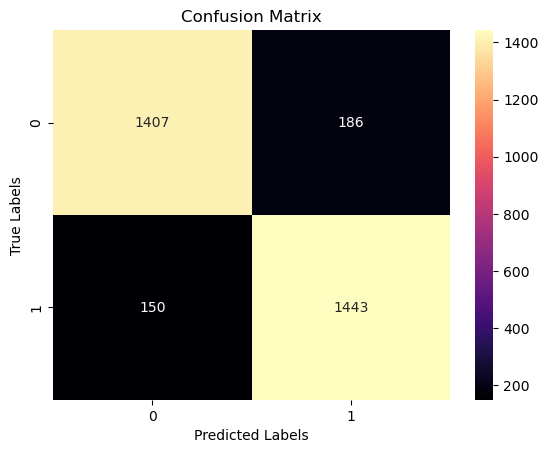

In [44]:
conf_matrix1 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap='magma')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

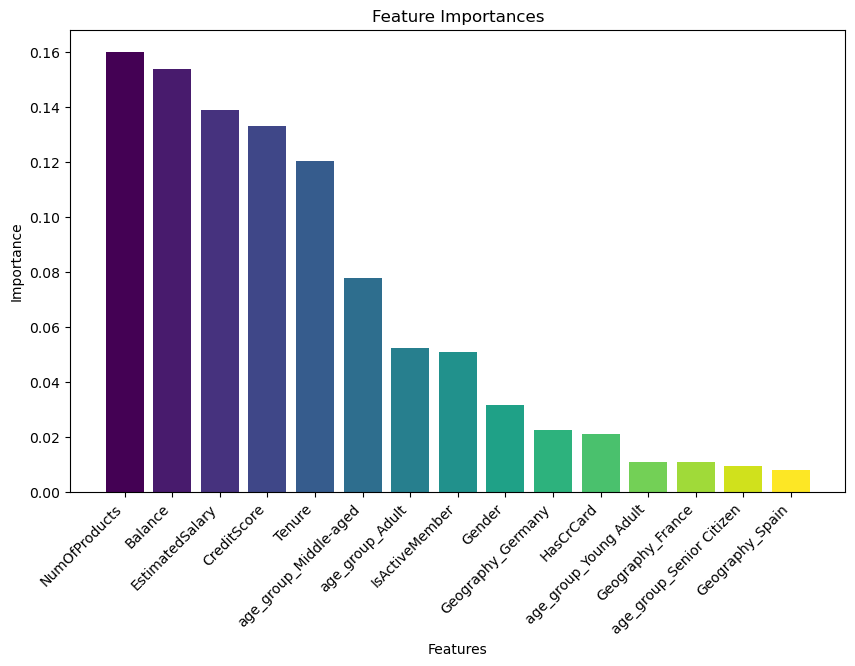

In [45]:
importances = best_rf.feature_importances_
feature_names = encoded_data.columns if isinstance(encoded_data, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
n = len(feature_importances['Feature'])
colors = plt.cm.viridis(np.linspace(0, 1, n))
# Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
!pip install shap
import shap

In [ ]:
# Convert NumPy array X_train into a DataFrame
column_names = encoded_data.columns.tolist()
X_train_df = pd.DataFrame(X_train, columns = column_names)  # Replace 'your_column_names' with the actual column names

# Create a SHAP explainer object
explainer = shap.Explainer(best_rf)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train_df)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=X_train_df.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()


# XGBOOST CLASSIFIER

In [47]:
! pip install xgboost
from xgboost import XGBClassifier

In [48]:
from sklearn.model_selection import GridSearchCV

# New, more focused parameter grid
param_grid = {
    'n_estimators': [200,300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3,4, 5],
    'colsample_bytree': [0.5, 0.7],
    'gamma': [0, 0.05,0.10],
    'subsample': [0.9, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=50),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred2 = best_model.predict(X_test)
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred2)

# Print results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print('Best parameters found: ', grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Train Accuracy: 0.9219
Test Accuracy: 0.8883
Best parameters found:  {'colsample_bytree': 0.5, 'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


In [49]:
# Classification Report (which includes the F1 score)
class_report2 = classification_report(y_test, y_pred2)
print('\nClassification Report:')
print(class_report2)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1593
           1       0.91      0.86      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



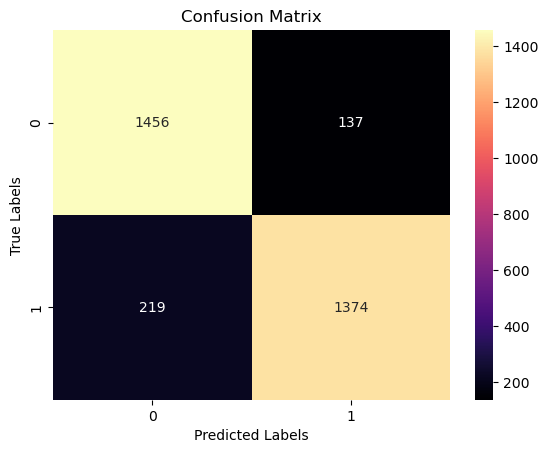

In [50]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap='magma')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

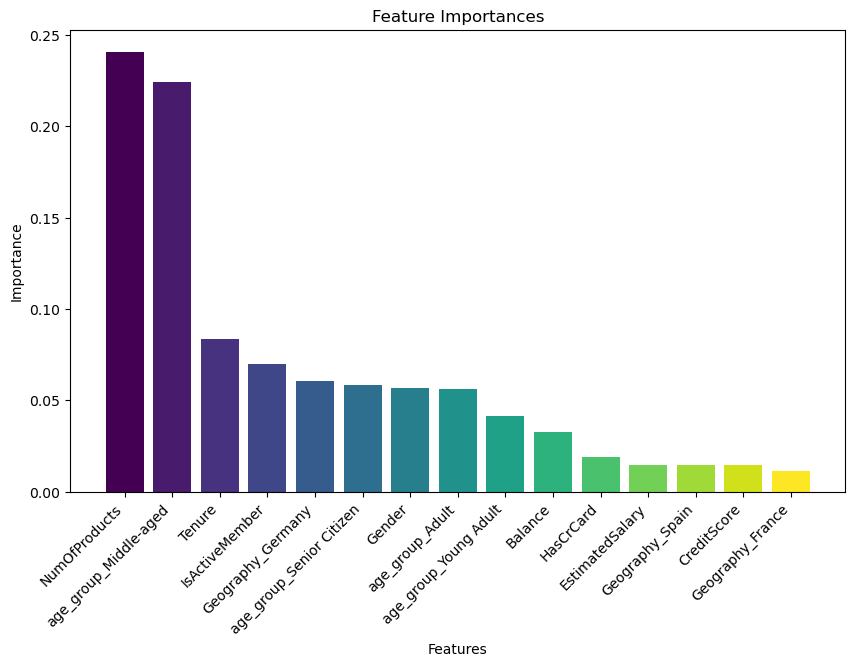

In [51]:
importances = best_model.feature_importances_
feature_names = encoded_data.columns if isinstance(encoded_data, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
n = len(feature_importances['Feature'])
colors = plt.cm.viridis(np.linspace(0, 1, n))
# Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:

# Create a SHAP explainer object
explainer = shap.Explainer(best_model)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=x_train.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

NameError: name 'x_train' is not defined

# Neural Network Model

In [52]:
!pip install tensorflow


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=38, batch_size=32, validation_data=(X_train, y_train), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/38


/Users/shaikreshma/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.6366 - loss: 0.6501 - val_accuracy: 0.7379 - val_loss: 0.5456
Epoch 2/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7151 - loss: 0.5751 - val_accuracy: 0.7524 - val_loss: 0.5289
Epoch 3/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7250 - loss: 0.5577 - val_accuracy: 0.7593 - val_loss: 0.5054
Epoch 4/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7470 - loss: 0.5258 - val_accuracy: 0.7718 - val_loss: 0.4880
Epoch 5/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7533 - loss: 0.5117 - val_accuracy: 0.7776 - val_loss: 0.4762
Epoch 6/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7546 - loss: 0.5075 - val_accuracy: 0.7776 - val_loss: 0.4699
Epoch 7/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7613 - loss: 0.4985 - val_accuracy: 0.7814 - val_loss: 0.4652
Epoch 8/38
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7628 - loss: 0.4951 - val_accurac

In [54]:
y_pred_prob = model.predict(X_test)
y_pred3 = (y_pred_prob > 0.5).astype("int32") 
print(classification_report(y_test, y_pred3))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1593
           1       0.80      0.78      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



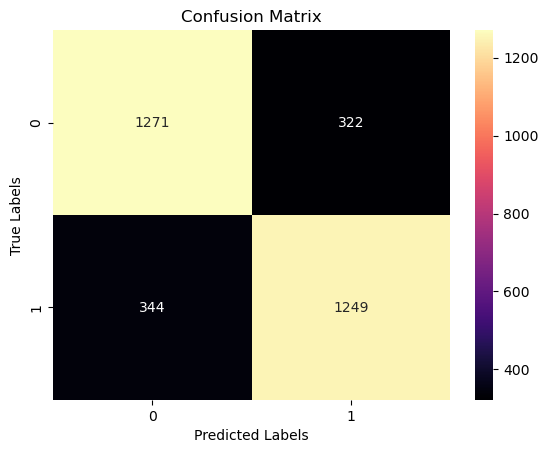

In [55]:
conf_matrix3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap='magma')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=x_train.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


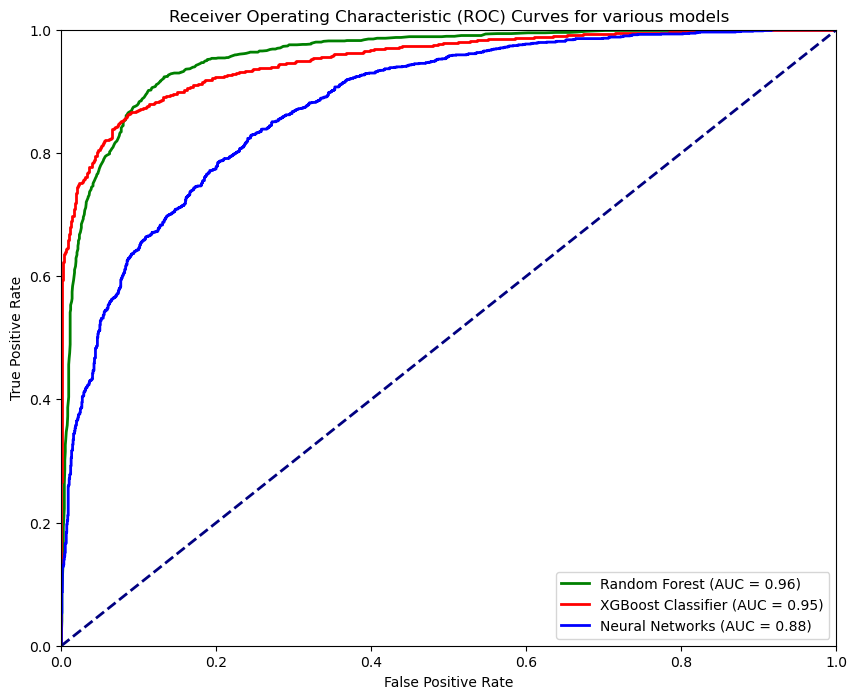

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr = []
tpr = []
auc_val = []

y_test_prob1 = best_rf.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_test_prob1)
auc_score1 = roc_auc_score(y_test, y_test_prob1)
fpr.append(fpr_1)
tpr.append(tpr_1)
auc_val.append(auc_score1)


y_test_prob2 = best_model.predict_proba(X_test)[:, 1]
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_test_prob2)
auc_score2 = roc_auc_score(y_test, y_test_prob2)
fpr.append(fpr_2)
tpr.append(tpr_2)
auc_val.append(auc_score2)

y_test_prob3 = model.predict(X_test)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_test_prob3)
auc_score3 = roc_auc_score(y_test, y_test_prob3)
fpr.append(fpr_3)
tpr.append(tpr_3)
auc_val.append(auc_score3)

plt.figure(figsize=(10, 8))
colors = ['green', 'red', 'blue']  # Added 'blue' as an additional color
labels = ['Random Forest', 'XGBoost Classifier', 'Neural Networks']
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{labels[i]} (AUC = {auc_val[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for various models')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Assuming `best_rf`, `best_model`, and `model` are your trained models
# Assuming `X_test` and `y_test` are your test data

# Predictions and evaluation metrics for Random Forest and XGBoost
accuracy_rf = accuracy_score(y_test, best_rf.predict(X_test))
accuracy_xgb = accuracy_score(y_test, best_model.predict(X_test))
precision_rf = precision_score(y_test, best_rf.predict(X_test))
precision_xgb = precision_score(y_test, best_model.predict(X_test))
recall_rf = recall_score(y_test, best_rf.predict(X_test))
recall_xgb = recall_score(y_test, best_model.predict(X_test))
auc_score_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
auc_score_xgb = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Predictions and evaluation metrics for Neural Network Model
y_pred_prob = model.predict(X_test)
y_pred_nn = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
auc_score_nn = roc_auc_score(y_test, y_pred_prob)

# Define evaluation metrics dictionary
evaluation_metrics = {
    'Model': ['Random Forest Classifier', 'XGBoost Classifier', 'Neural Network Model'],
    'Accuracy': [accuracy_rf, accuracy_xgb, accuracy_nn],
    'Precision': [precision_rf, precision_xgb, precision_nn],
    'Recall': [recall_rf, recall_xgb, recall_nn],
    'AUC Score': [auc_score_rf, auc_score_xgb, auc_score_nn]
}

# Create a DataFrame to store the metrics
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_metrics_df)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
                      Model  Accuracy  Precision    Recall  AUC Score
0  Random Forest Classifier  0.894539   0.885820  0.905838   0.956343
1        XGBoost Classifier  0.888261   0.909332  0.862524   0.951359
2      Neural Network Model  0.790960   0.795035  0.784055   0.878927
